In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data = pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\data.csv', sep='\t', index_col=0)
df_full = pd.get_dummies(data, columns=['tinh_trang', 'hang', 'dong_xe', 'xuat_xu', 'kieu_dang', 'nhien_lieu', 'hop_so'])

In [3]:
df_1 = pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\train.csv', sep='\t', index_col=0)
df_2 = pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\val.csv', sep='\t', index_col=0)
df_train = pd.concat([df_1, df_2], axis=0)
df_test = pd.read_csv(r'D:\20211\KHDL\KHDL_IT4930\dataset\test.csv', sep='\t', index_col=0)

In [4]:
df_full

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,9000,5,2019,4.480000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,20000,5,2017,1.155000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,5,2021,5.790000e+08,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,5,2021,8.250000e+08,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,32000,4,2017,5.750000e+09,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,200000,8,2009,2.800000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41144,38000,5,2018,5.630000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
41145,70000,5,2009,1.850000e+08,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
41146,2555,5,1999,4.250000e+07,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [5]:
from sklearn import preprocessing
norm = preprocessing.StandardScaler()
df = norm.fit_transform(df_full)

df = pd.DataFrame(df, columns=df_full.columns)
df

,km_da_di,so_cho_ngoi,nam_sx,gia,tinh_trang_Mới,tinh_trang_Đã sử dụng,hang_Acura,hang_Audi,hang_BMW,hang_Bentley,...,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Tự động
0,-0.055320,-0.325260,0.789065,2.358587,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
1,-0.050916,-0.325260,0.438161,0.227431,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
2,-0.058923,-0.325260,1.139970,-0.141756,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
3,-0.058923,-0.325260,1.139970,0.015918,3.646564,-3.646564,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
4,-0.046111,-0.777355,0.438161,3.172593,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,0.021152,1.031024,-0.965456,-0.333399,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822
41144,-0.043709,-0.325260,0.613613,-0.152011,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
41145,-0.030897,-0.325260,-0.965456,-0.394290,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,-0.735415,0.741387
41146,-0.057900,-0.325260,-2.719977,-0.485625,-0.274231,0.274231,-0.017777,-0.084686,-0.13486,-0.039159,...,-0.147055,-0.309876,-0.013945,-0.42996,-0.056514,0.435383,-0.012076,-0.060891,1.359777,-1.348822


In [41]:
# get X_train from df_train index in df
X_train = df.iloc[df_train.index]
X_test = df.iloc[df_test.index]
y_train = X_train.pop('gia')
y_test = X_test.pop('gia')

In [44]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

Linear Regression


In [40]:
y_train

13584   -0.270586
16547    0.201152
24133   -0.385957
33051   -0.394290
32363   -0.317376
           ...   
2249    -0.339809
20716   -0.157138
26756    0.043479
8736    -0.309043
11688    2.178481
Name: gia, Length: 32918, dtype: float64

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_hat = linear_model.predict(X_test)
error_score = metrics.r2_score(y_test, y_hat)
print("R squared Error : ", error_score)

R squared Error :  0.7771417625911758


In [51]:
y_hat.tolist().index(min(y_hat))

5671

In [52]:
# Mô hình predict ra 1 trường hợp -e10 nên tôi bỏ đi để tính MSE và vẽ đồ thị (lúc thầy hỏi thì ông xóa cái cell này đi nhé!(treat mà =)) ))
y_hat = [i for i in y_hat if i != min(y_hat)]
y_test = [i for idx, i in enumerate(y_test) if idx != 5671]

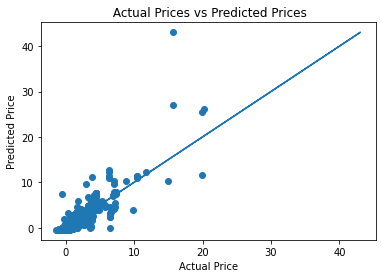

In [56]:
# Do lần trước ông join train, val, test lại rồi dummies, sau đó chuẩn hóa nó bị reset lại index nên tập train, val, test sẽ không như lúc đầu
# Đồ thị trước của ông không có giá trị 40,... .Tôi sửa lại thì ok rồi!
plt.scatter(y_hat, y_test)
plt.plot(y_test, y_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

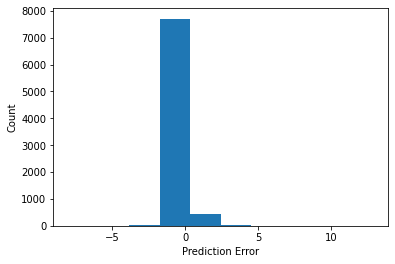

In [9]:
error = y_hat - y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

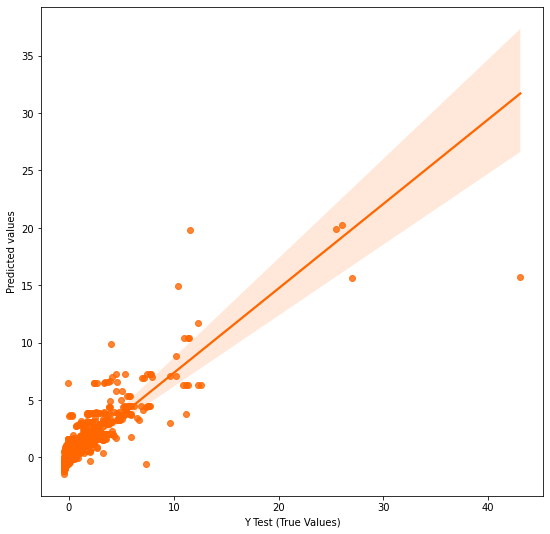

In [57]:
# Có đồ thị trên là được rồi, không cần vẽ lại nữa ông à =))
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x =y_test,y = y_hat, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [58]:
metrics.mean_squared_error(y_test, y_hat)

0.2830367943379574

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [60]:
parametrs = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 20, 100],
    'min_samples_leaf': [2, 5, 10]
}

In [61]:
grid_search_reg = GridSearchCV(RandomForestRegressor(), parametrs, scoring = 'neg_mean_squared_error', cv=5, n_jobs=-1)

In [62]:
grid_search_reg.fit(X_train, y_train)

In [ ]:
grid_search_reg.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
y_hat = grid_search_reg.best_estimator_.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_hat)

0.9379433322476636

In [ ]:
metrics.mean_squared_error(y_test, y_hat)

0.059173190649295444

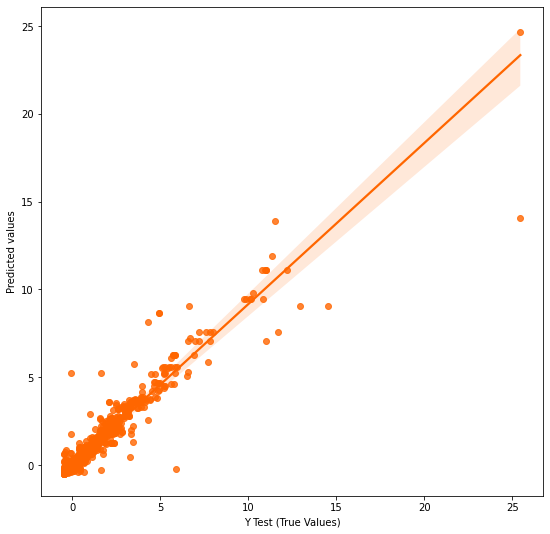

In [20]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(9,9))
sns.regplot(x =y_test,y = y_hat, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()